<a href="https://colab.research.google.com/github/ykjoy/mining/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artifical Neural Network

In [2]:
from tensorflow import keras

# 10개의 패션 상품 이미지 (28*28 크기의 회색조 이미지) 데이터: 학습용 6만개, 시험용 1만개 
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [4]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


## 학습데이터 10개의 그림 출력하기

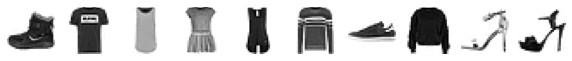

In [5]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,10, figsize = (10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()


In [6]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


## 학습용 데이터 target 값 확인

In [8]:
class_names = ['티셔츠', '바지', '풀오버', '드레스', '코드', '샌달', '셔츠', '스니커즈', '가방', '부츠']

for i in range(10):
    print(class_names[train_target[i]], end = ",")

부츠,티셔츠,티셔츠,드레스,티셔츠,풀오버,스니커즈,풀오버,샌달,샌달,

In [10]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 데이터 정제

In [11]:
train_scaled = train_input/255.0   # 학습데이터 입력값을 0~1사이로 변환
train_scaled = train_scaled.reshape(-1,28*28)   # 2차원을 1차원으로 펼쳐서 입력값으로 사용
test_scaled = test_input/255.0
test_scaled = test_scaled.reshape(-1,28*28)

##신경망 구성

In [12]:
# 1. 입력과 출력층만 갖는 신경망 구조 생성 (분류 10개 클래스)
dense = keras.layers.Dense(10, activation = 'softmax', input_shape=(784,))
model = keras.Sequential([dense])  # 생성된 dense층 추가
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [13]:
#2. 위에서 구성된 신경망을 데이터를 사용해서 훈련
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5863 - accuracy: 0.8019
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4722 - accuracy: 0.8419
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4519 - accuracy: 0.8494
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4417 - accuracy: 0.8525
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4352 - accuracy: 0.8551


In [14]:
# 3. 성능 평가하기
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 0s 884us/step - loss: 0.4845 - accuracy: 0.8379


[0.484544038772583, 0.8378999829292297]

In [15]:
# 세부 예측결과 확인
pred_detail = model.predict(test_scaled)  # 세부값 예측. 각 클래스별 확률로 출력됨. 슬라이싱 해서 일부만 하면 빠름[0:1]


313/313 [==============================] - 0s 711us/step


In [16]:
pred_index = np.argmax(pred_detail[0])  #가장 큰 인덱스 반환
print(class_names[pred_index])   # 첫번째 테스트데이터 예측결과 출력 

부츠


In [17]:
print(class_names[test_target[0]])

부츠


# (Advanced) Deep Neaural Network


In [18]:
from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 1. 데이터 입력 준비
train_scaled = train_input/255.0
test_scaled = test_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)

# 2. 신경망 구성
dense1 = keras.layers.Dense(100, activation = 'relu', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')
model = keras.Sequential([dense1, dense2])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

# 3. 신경망 학습
model.fit(train_scaled, train_target, epochs = 5)

#4. 성능평가
model.evaluate(test_scaled, test_target)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5097 - accuracy: 0.8196
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3820 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3508 - accuracy: 0.8758
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3319 - accuracy: 0.8818
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3911 - accuracy: 0.8676


[0.39113670587539673, 0.8676000237464905]

## 과대적합 방지

In [19]:
'''from tensorflow import keras

(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# 1. 데이터 입력 준비
train_scaled = train_input/255.0
test_scaled = test_input/255.0
train_scaled = train_scaled.reshape(-1, 28*28)
test_scaled = test_scaled.reshape(-1, 28*28)

# 2. 신경망 구성
dense1 = keras.layers.Dense(100, activation = 'relu', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')
model = keras.Sequential([dense1, dense2])
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
'''
######## 과대적합 방지 - 콜백 ##############
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
######################################
# 3. 신경망 학습
model.fit(train_scaled, train_target, epochs = 30, validation_data = (test_scaled,test_target), callbacks = [checkpoint_cb,early_stopping_cb])

print("조기종료: %f"   %(early_stopping_cb.stopped_epoch))
#4. 성능평가
model.evaluate(test_scaled, test_target)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.8902 - val_loss: 0.4164 - val_accuracy: 0.8687
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3018 - accuracy: 0.8941 - val_loss: 0.3819 - val_accuracy: 0.8754
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2960 - accuracy: 0.8973 - val_loss: 0.4178 - val_accuracy: 0.8657
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2892 - accuracy: 0.8997 - val_loss: 0.3877 - val_accuracy: 0.8792
조기종료: 3.000000
313/313 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8754


[0.3819120526313782, 0.8754000067710876]

## Convolutional Neural Networks(CNN, 합성곱 신경망)

In [20]:
from tensorflow import keras
# 1. 데이터 입력 준비(패션 Minst)
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0
test_scaled = test_input/255.0
train_scaled = train_scaled.reshape(-1, 28,28,1)  #-1은 데이터 수, 뒤의 (28,28,1)이 각 그림의 크기임
test_scaled = test_scaled.reshape(-1, 28,28, 1)

# 2. 신경망 구성
convol = keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding='same', input_shape = (28,28,1)) #2차원 모양을 그대로 유지, 흑백이라 1
pooling = keras.layers.MaxPooling2D(2)
flatten = keras.layers.Flatten()
dense = keras.layers.Dense(10, activation = 'softmax')  # 출력층 -   밀집층으로 이전과 동일
model = keras.Sequential([convol, pooling, flatten,dense]) #CNN 또는 dense층을 상황에 따라서 추가하면 됨.
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.summary()   #신경망 구성 확인
##########이후 완전 동일##################/
#과대적합 방지 - 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
######################################
# 3. 신경망 학습
model.fit(train_scaled, train_target, epochs = 30, validation_data = (test_scaled,test_target), callbacks = [checkpoint_cb,early_stopping_cb])

#4. 성능평가
model.evaluate(test_scaled, test_target)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                62730     
                                                                 
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4305 - accuracy: 0.8495 - val_loss: 

[0.2794153690338135, 0.906000018119812]